In [19]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set the base dataset path
BASE_DATASET_PATH = './dataset/ade/ADEChallengeData2016'

# Set paths for images and annotations
IMAGE_PATH = os.path.join(BASE_DATASET_PATH, 'images/training')
ANNOTATION_PATH = os.path.join(BASE_DATASET_PATH, 'annotations/training')

# Load the text file containing filenames and metadata
index_file = './dataset/ade/ADEChallengeData2016/sceneCategories.txt'


In [4]:
# Read the text file and parse its contents
filenames = []
with open(index_file, 'r') as f:
    for line in f:
        parts = line.strip().split()  # Adjust if needed
        filenames.append(parts[0])  # Assuming the filename is the first part


In [5]:
def load_dataset(img_name, seg_name):
    print(f"Loading image from: {img_name}")
    print(f"Loading segmentation from: {seg_name}")

    if not os.path.exists(img_name):
        print(f"Image file does not exist: {img_name}")
        return None, None

    if not os.path.exists(seg_name):
        print(f"Segmentation file does not exist: {seg_name}")
        return None, None

    img = cv2.imread(img_name)[:, :, ::-1]  # Convert BGR to RGB
    seg = cv2.imread(seg_name)[:, :, ::-1]
        
    return img, seg

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000001.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000001.png
Image shape: (512, 683, 3)
Segmentation shape: (512, 683, 3)


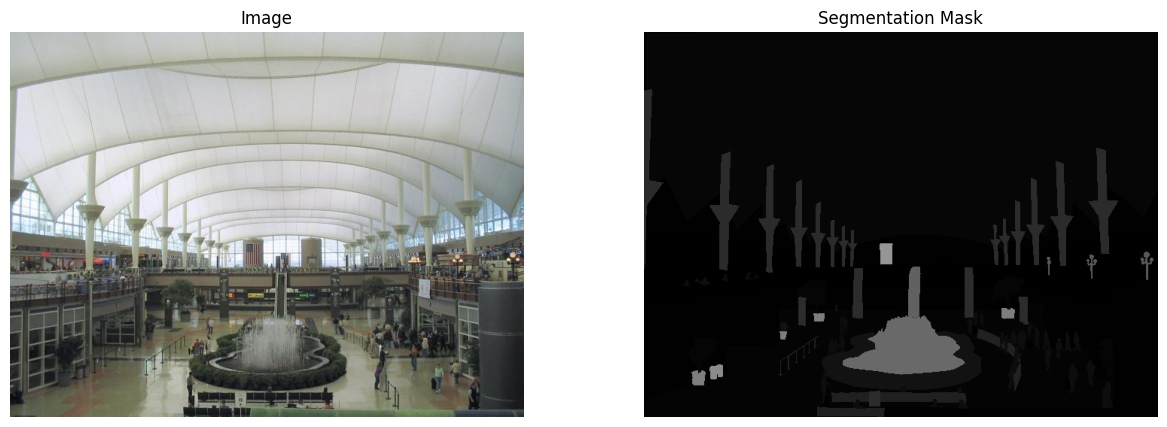

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000002.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000002.png
Image shape: (512, 711, 3)
Segmentation shape: (512, 711, 3)


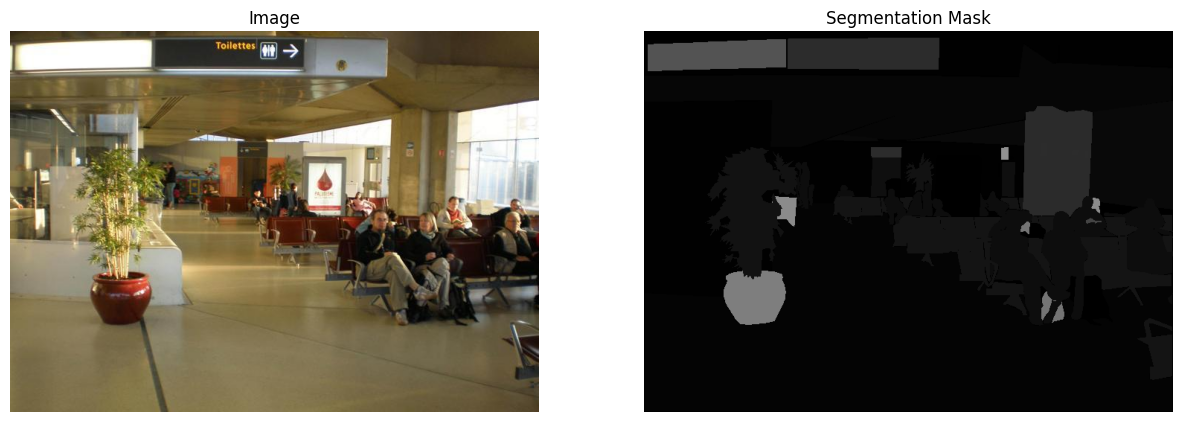

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000003.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000003.png
Image shape: (512, 683, 3)
Segmentation shape: (512, 683, 3)


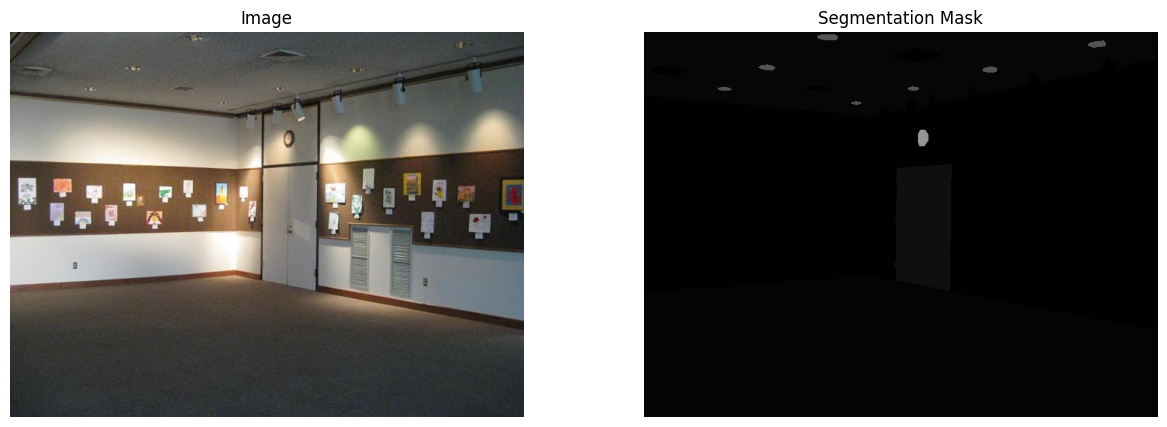

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000004.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000004.png
Image shape: (251, 384, 3)
Segmentation shape: (251, 384, 3)


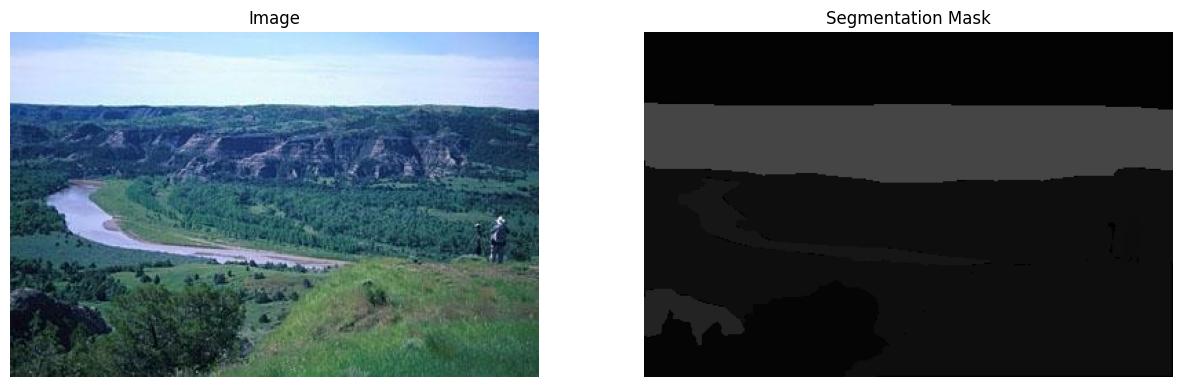

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000005.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000005.png
Image shape: (512, 683, 3)
Segmentation shape: (512, 683, 3)


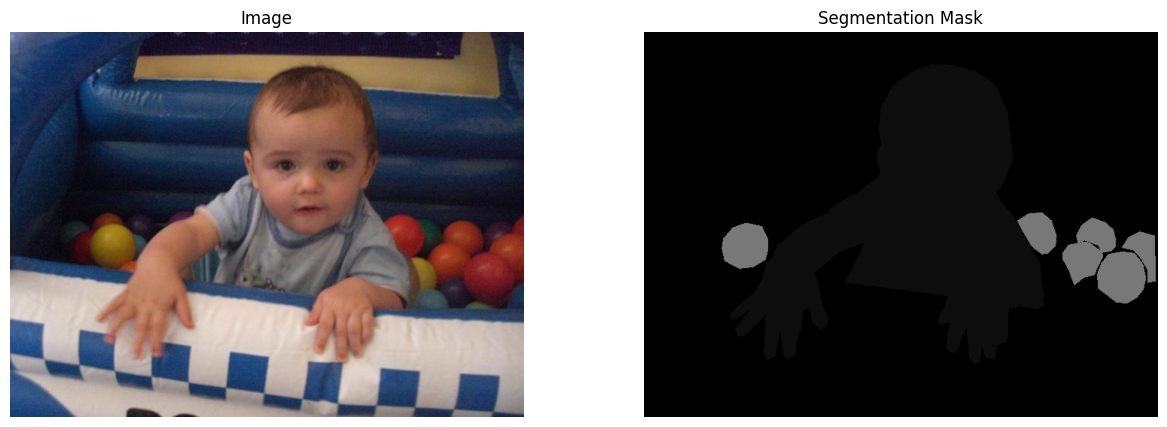

In [6]:
def display_image_and_segmentation(img, seg): 
    print("Image shape:", img.shape)
    print("Segmentation shape:", seg.shape)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(seg)
    plt.title('Segmentation Mask')
    plt.axis('off')

    plt.show()

for i in range(5):
    file_name = filenames[i]
    img_file_name = os.path.join(IMAGE_PATH, file_name + '.jpg')  # Ensure the correct extension is added
    seg_file_name = os.path.join(ANNOTATION_PATH, file_name + '.png')  # Assuming seg masks are PNG
    img, seg = load_dataset(img_file_name, seg_file_name)
    display_image_and_segmentation(img, seg)

In [7]:
# Displaying object presence and other information would depend on how the text file is structured
num_obj = len(filenames)
print("Dataset: {} images".format(num_obj))

Dataset: 22210 images


Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000001.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000001.png


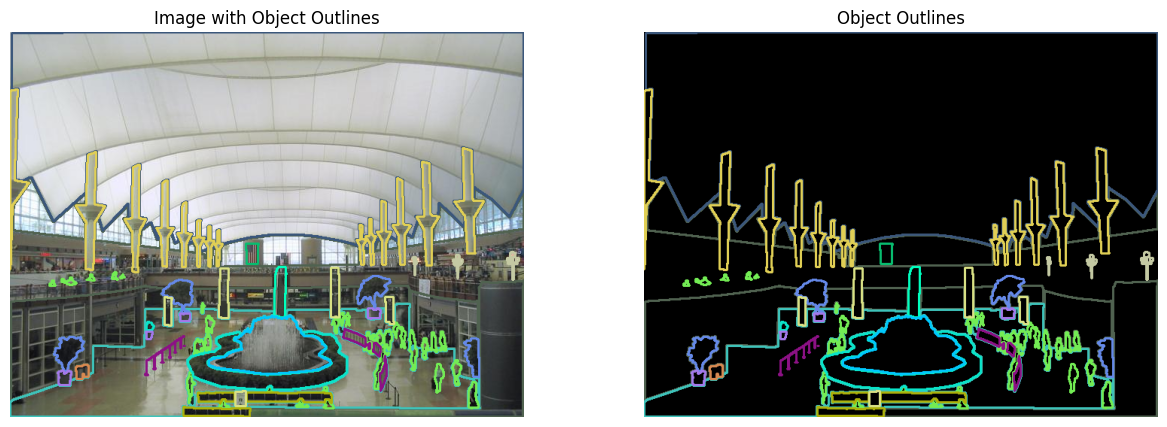

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000002.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000002.png


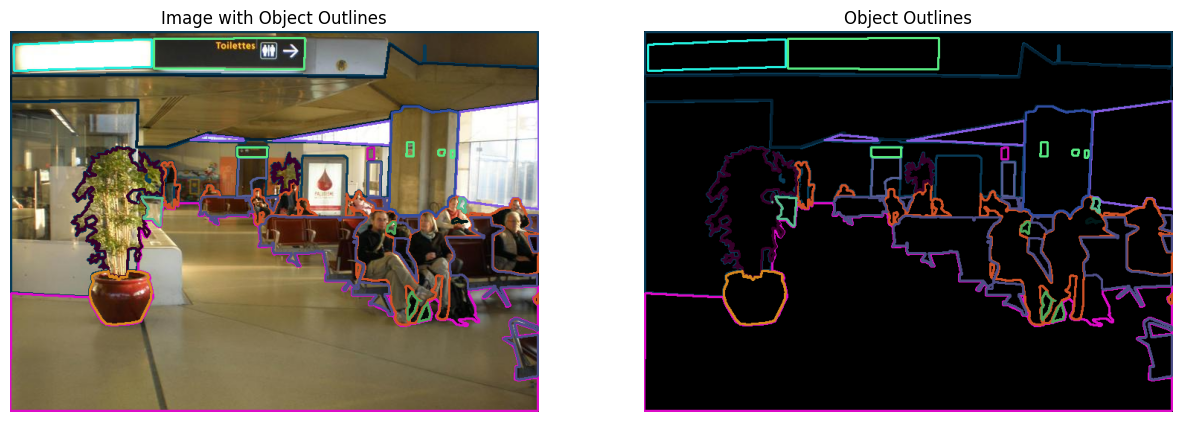

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000003.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000003.png


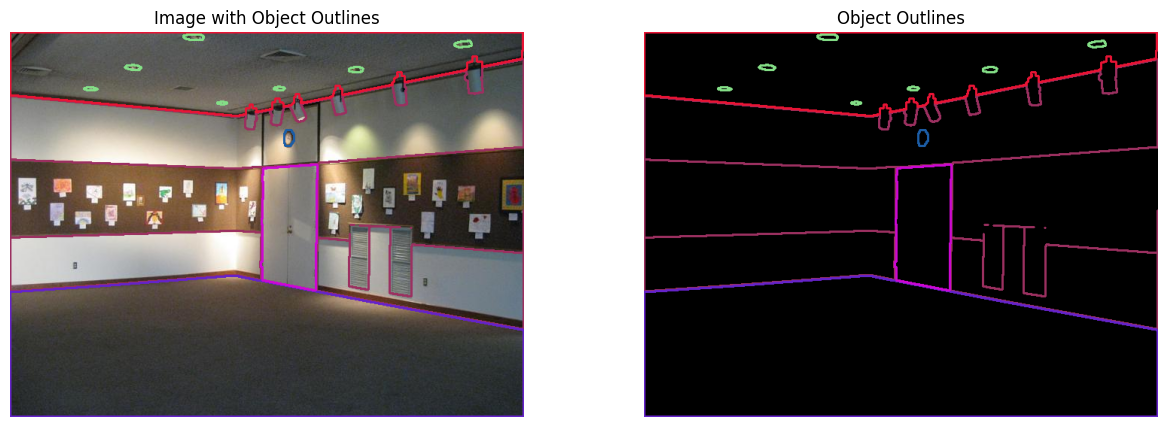

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000004.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000004.png


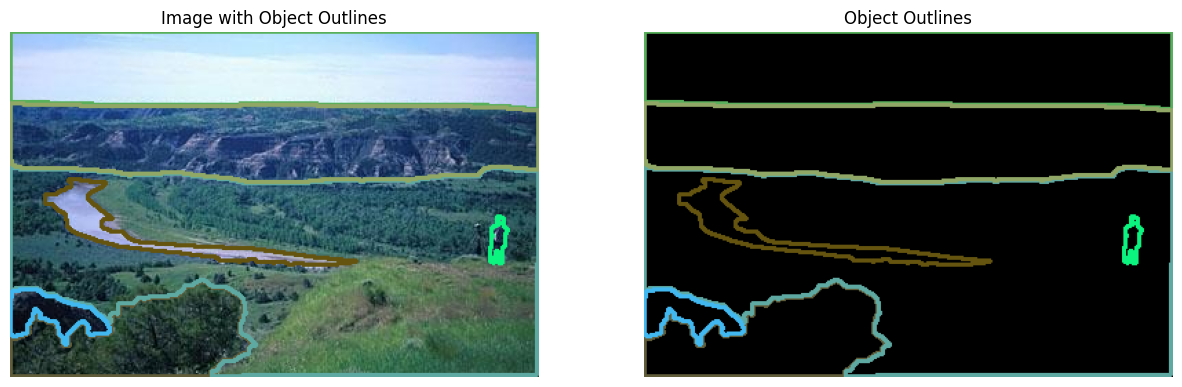

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000005.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000005.png


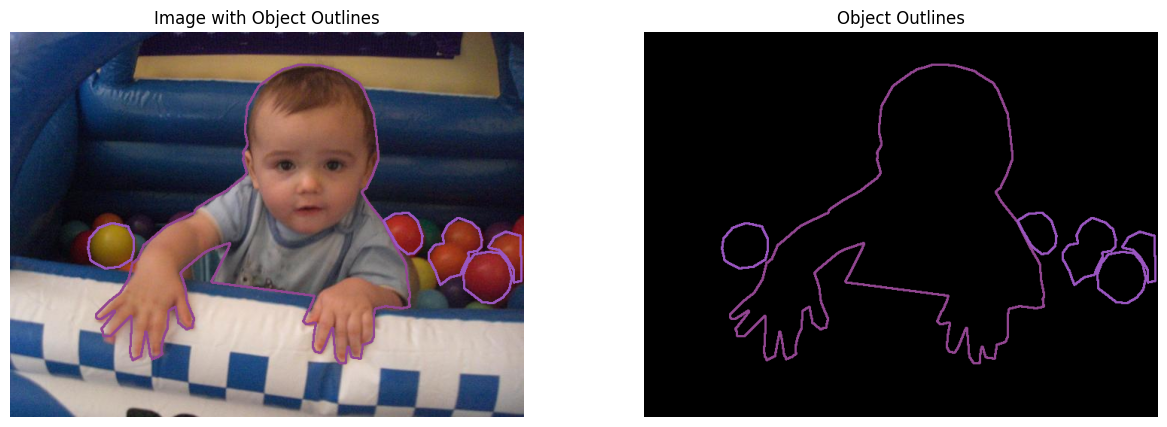

In [8]:
def display_image_with_outlines(img, seg):
    # Convert the segmentation mask to grayscale
    seg_gray = cv2.cvtColor(seg, cv2.COLOR_BGR2GRAY)

    # Get unique values in the segmentation mask
    unique_values = np.unique(seg_gray)

    # Create a color image to draw contours
    img_with_contours = img.copy()
    # Create a blank image to draw contours
    outline_image = np.zeros_like(img)

    # Loop through unique values in the segmentation mask
    for value in unique_values:
        if value > 0:  # Ignore background (0 value)
            # Create a binary mask for the current object
            binary_mask = np.zeros(seg_gray.shape, dtype=np.uint8)
            binary_mask[seg_gray == value] = 255

            # Find contours for the current object
            contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Generate a random color for the current object
            color = np.random.randint(0, 256, size=(3,), dtype=int).tolist()  # Random color (B, G, R)

            # Draw the contours on the original image using the random color
            cv2.drawContours(img_with_contours, contours, -1, color, 2)  # Thickness 2
            # Draw the contours on the blank image
            cv2.drawContours(outline_image, contours, -1, color, 2)
            
    # Display the loaded image and segmentation mask
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_with_contours)  # Convert to RGB for displaying with matplotlib
    plt.title('Image with Object Outlines')
    plt.axis('off')  # Turn off axis

    plt.subplot(1, 2, 2)
    plt.imshow(outline_image)
    plt.title('Object Outlines')
    plt.axis('off')

    plt.show()

for i in range(5):
    file_name = filenames[i]
    img_file_name = os.path.join(IMAGE_PATH, file_name + '.jpg')  # Ensure the correct extension is added
    seg_file_name = os.path.join(ANNOTATION_PATH, file_name + '.png')  # Assuming seg masks are PNG
    img, seg = load_dataset(img_file_name, seg_file_name)
    display_image_with_outlines(img, seg)

In [16]:
def load_ade20k_classes(info_file="objectInfo150.txt"):
    id2class = {}
    with open(info_file) as f:
        next(f)  # skip header
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                idx = int(parts[0])
                # join everything from column 5 onwards as name (handles spaces/commas)
                name = " ".join(parts[4:])
                id2class[idx] = name
    return id2class


Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000001.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000001.png


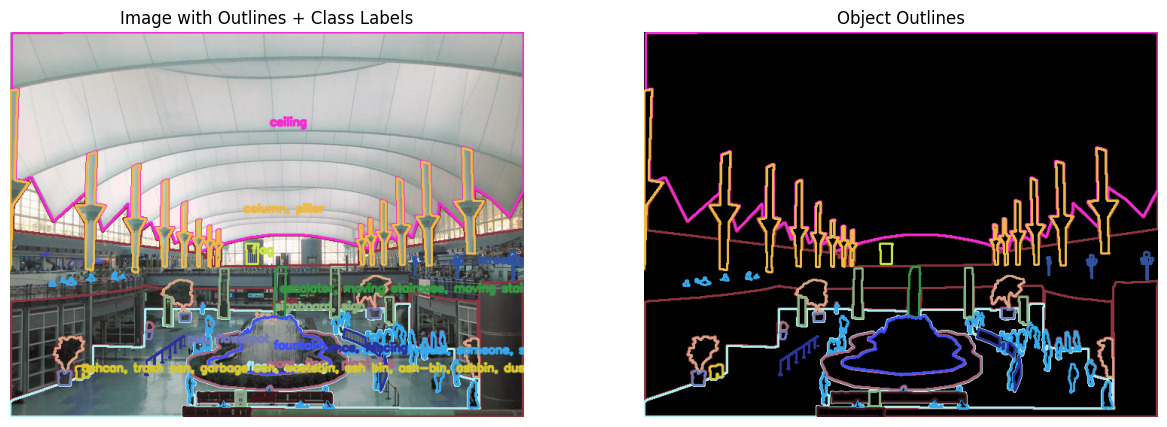

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000002.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000002.png


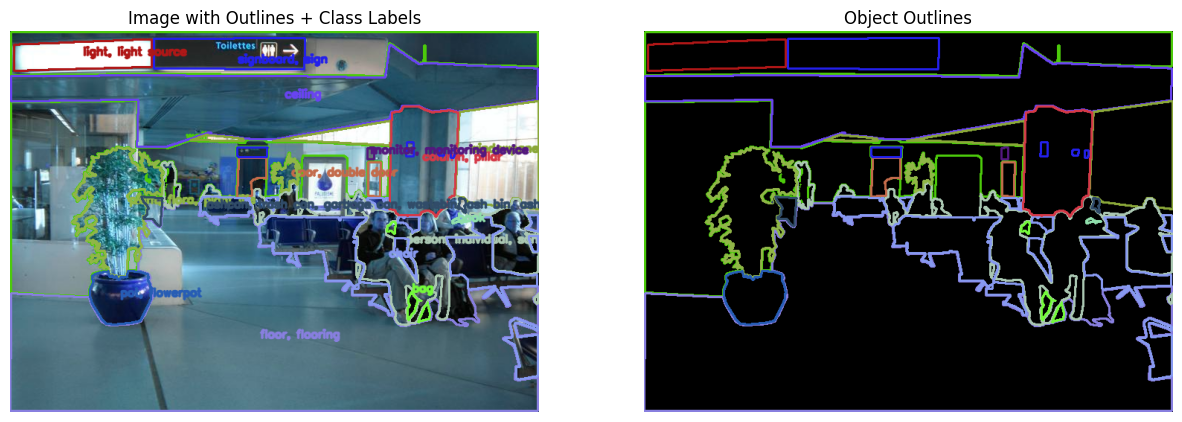

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000003.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000003.png


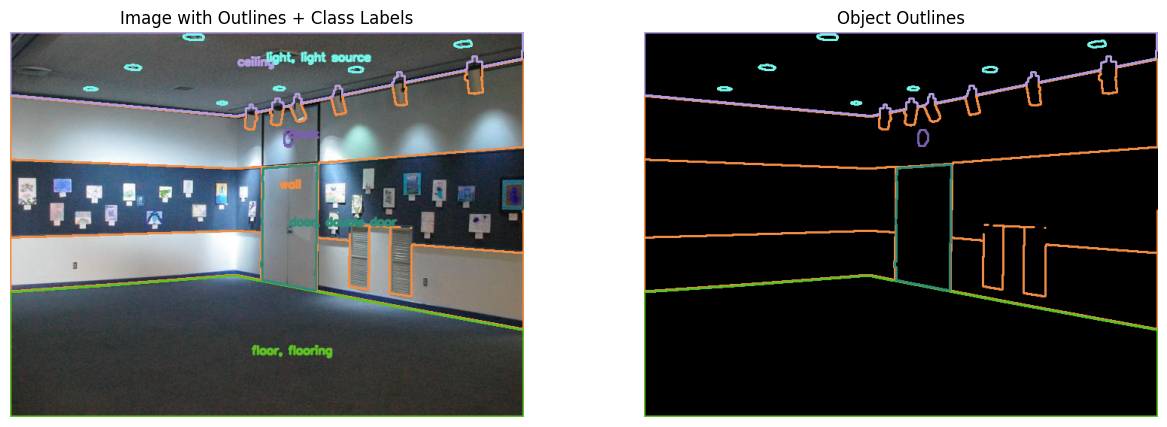

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000004.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000004.png


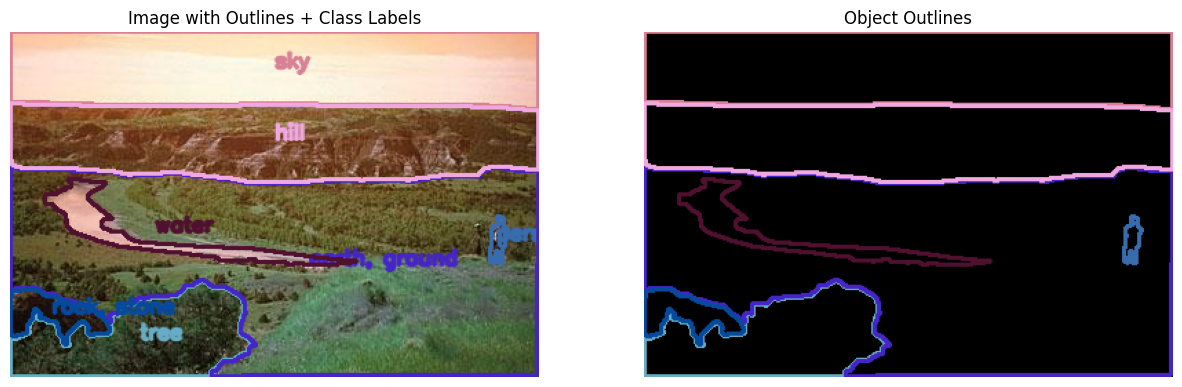

Loading image from: ./dataset/ade/ADEChallengeData2016\images/training\ADE_train_00000005.jpg
Loading segmentation from: ./dataset/ade/ADEChallengeData2016\annotations/training\ADE_train_00000005.png


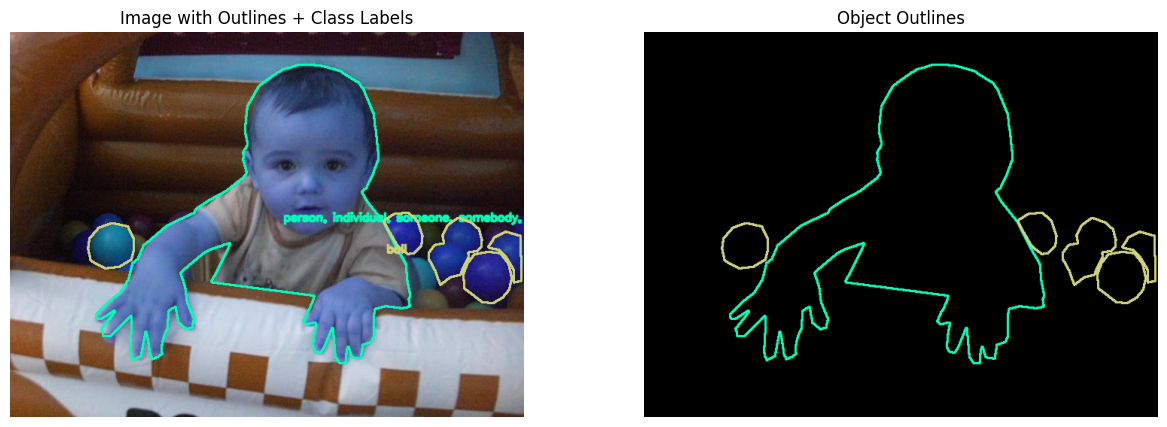

In [17]:
def display_image_with_outlines(img, seg, id2class):
    # Convert mask to grayscale if not already
    if len(seg.shape) == 3:
        seg_gray = cv2.cvtColor(seg, cv2.COLOR_BGR2GRAY)
    else:
        seg_gray = seg.copy()

    unique_values = np.unique(seg_gray)

    img_with_contours = img.copy()
    outline_image = np.zeros_like(img)

    for value in unique_values:
        if value > 0:  # Ignore background
            binary_mask = np.zeros(seg_gray.shape, dtype=np.uint8)
            binary_mask[seg_gray == value] = 255

            contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if len(contours) == 0:
                continue

            color = np.random.randint(0, 256, size=(3,), dtype=int).tolist()

            cv2.drawContours(img_with_contours, contours, -1, color, 2)
            cv2.drawContours(outline_image, contours, -1, color, 2)

            # centroid for label
            M = cv2.moments(binary_mask)
            if M["m00"] > 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])

                class_name = id2class.get(value, f"ID {value}")
                cv2.putText(img_with_contours, class_name, (cx, cy),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2, cv2.LINE_AA)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
    plt.title('Image with Outlines + Class Labels')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(outline_image, cv2.COLOR_BGR2RGB))
    plt.title('Object Outlines')
    plt.axis('off')

    plt.show()


id2class = load_ade20k_classes("./dataset/ade/ADEChallengeData2016/objectInfo150.txt")

for i in range(5):
    file_name = filenames[i]
    img_file_name = os.path.join(IMAGE_PATH, file_name + '.jpg')
    seg_file_name = os.path.join(ANNOTATION_PATH, file_name + '.png')
    img, seg = load_dataset(img_file_name, seg_file_name)
    display_image_with_outlines(img, seg, id2class)

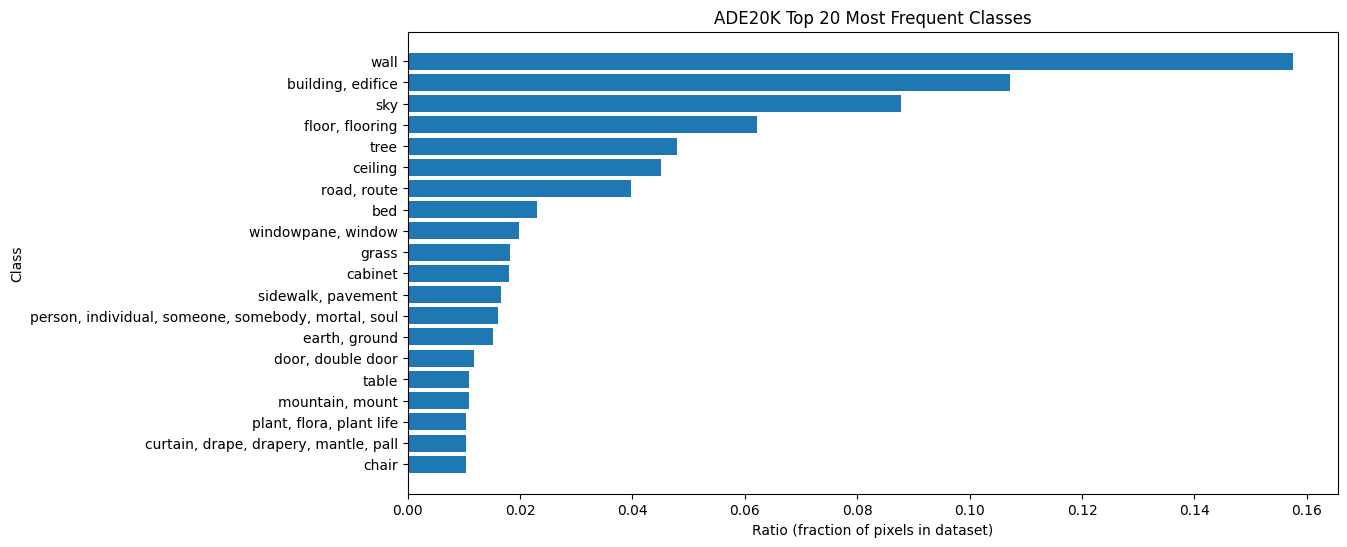

In [20]:
def load_ade20k_distribution(info_file="objectInfo150.txt"):
    data = []
    with open(info_file) as f:
        next(f)  # skip header
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                idx = int(parts[0])
                ratio = float(parts[1])
                train = int(parts[2])
                val = int(parts[3])
                name = " ".join(parts[4:])
                data.append([idx, ratio, train, val, name])
    return pd.DataFrame(data, columns=["Idx", "Ratio", "Train", "Val", "Name"])

# Load data
df = load_ade20k_distribution("./dataset/ade/ADEChallengeData2016/objectInfo150.txt")

# Plot top 20 classes by ratio
top_classes = df.sort_values("Ratio", ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.barh(top_classes["Name"], top_classes["Ratio"])
plt.xlabel("Ratio (fraction of pixels in dataset)")
plt.ylabel("Class")
plt.title("ADE20K Top 20 Most Frequent Classes")
plt.gca().invert_yaxis()  # largest at top
plt.show()


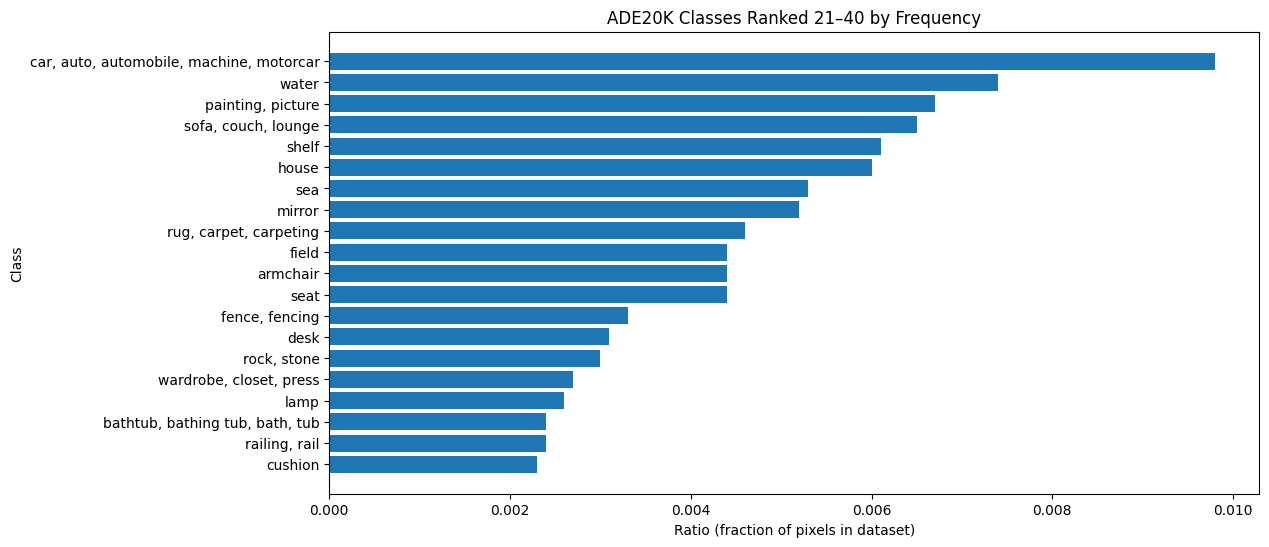

In [24]:
# Next 20 classes (rank 21–40)
next20_classes = df.sort_values("Ratio", ascending=False).iloc[20:40]

plt.figure(figsize=(12,6))
plt.barh(next20_classes["Name"], next20_classes["Ratio"])
plt.xlabel("Ratio (fraction of pixels in dataset)")
plt.ylabel("Class")
plt.title("ADE20K Classes Ranked 21–40 by Frequency")
plt.gca().invert_yaxis()
plt.show()


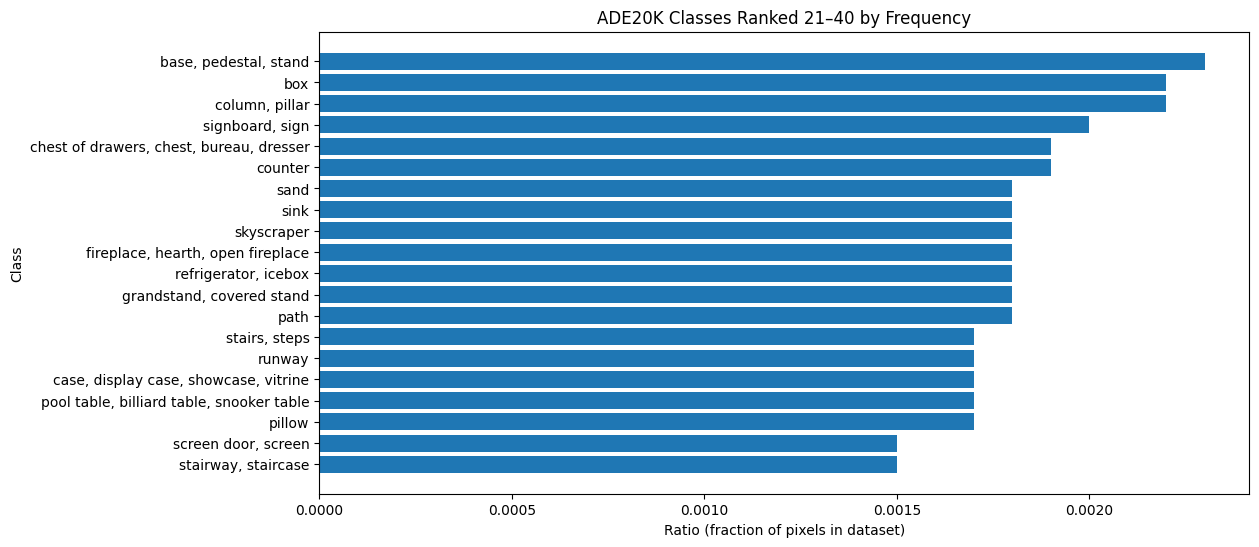

In [ ]:
next20_classes = df.sort_values("Ratio", ascending=False).iloc[40:60]

plt.figure(figsize=(12,6))
plt.barh(next20_classes["Name"], next20_classes["Ratio"])
plt.xlabel("Ratio (fraction of pixels in dataset)")
plt.ylabel("Class")
plt.title("ADE20K Classes Ranked 41–60 by Frequency")
plt.gca().invert_yaxis()
plt.show()


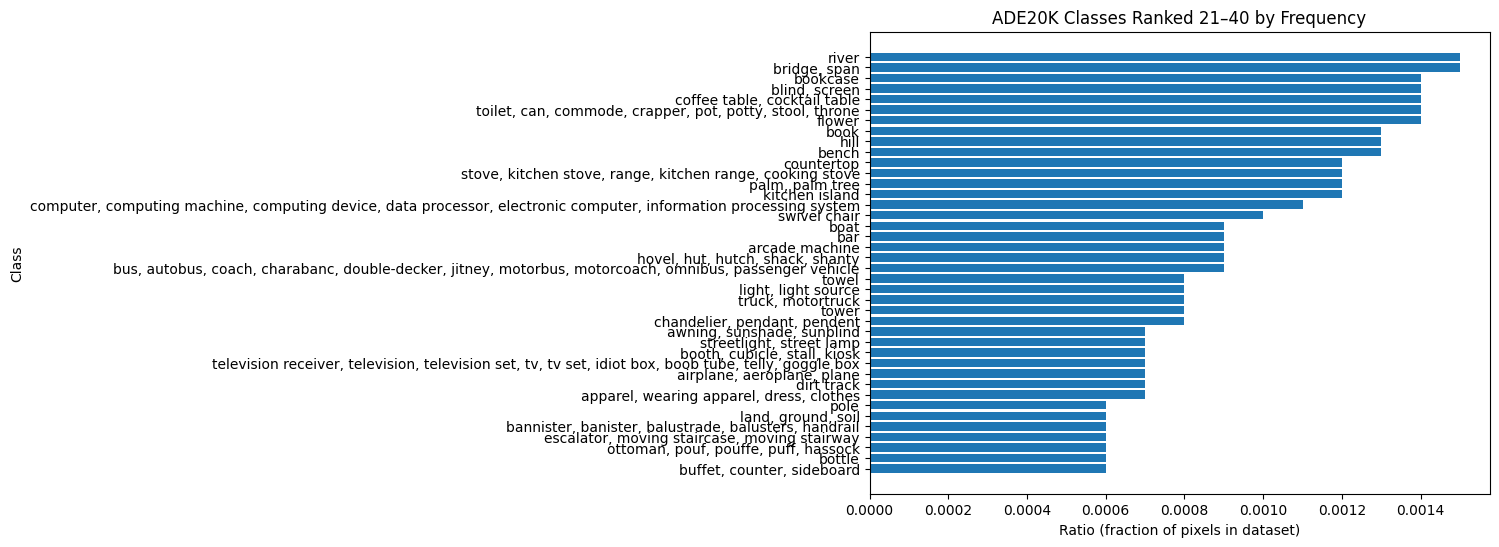

In [ ]:
next20_classes = df.sort_values("Ratio", ascending=False).iloc[60:100]

plt.figure(figsize=(8,6))
plt.barh(next20_classes["Name"], next20_classes["Ratio"])
plt.xlabel("Ratio (fraction of pixels in dataset)")
plt.ylabel("Class")
plt.title("ADE20K Classes Ranked 61–100 by Frequency")
plt.gca().invert_yaxis()
plt.show()


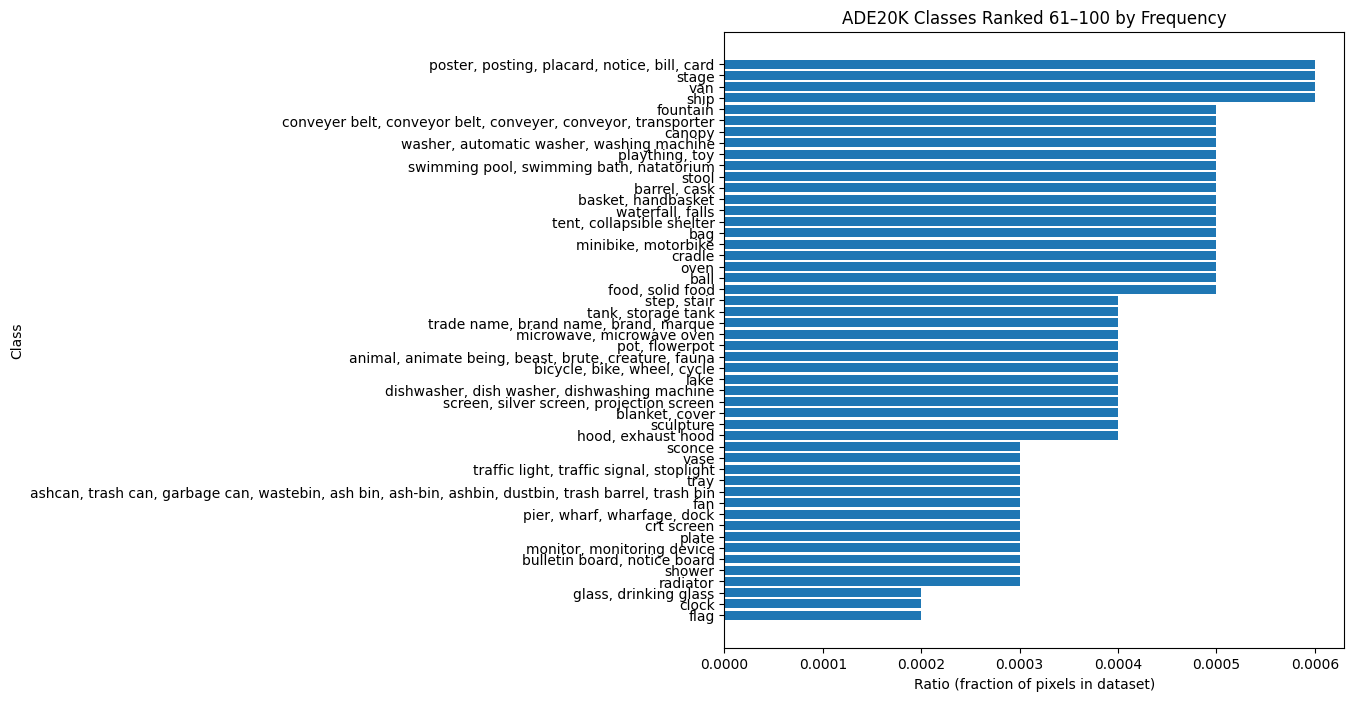

In [38]:
next20_classes = df.sort_values("Ratio", ascending=False).iloc[100:152]

plt.figure(figsize=(8,8))
plt.barh(next20_classes["Name"], next20_classes["Ratio"])
plt.xlabel("Ratio (fraction of pixels in dataset)")
plt.ylabel("Class")
plt.title("ADE20K Classes Ranked 61–100 by Frequency")
plt.gca().invert_yaxis()
plt.show()


In [21]:
print("Total semantic classes (excluding background):", len(df))
print("Including background:", len(df) + 1)

Total semantic classes (excluding background): 150
Including background: 151


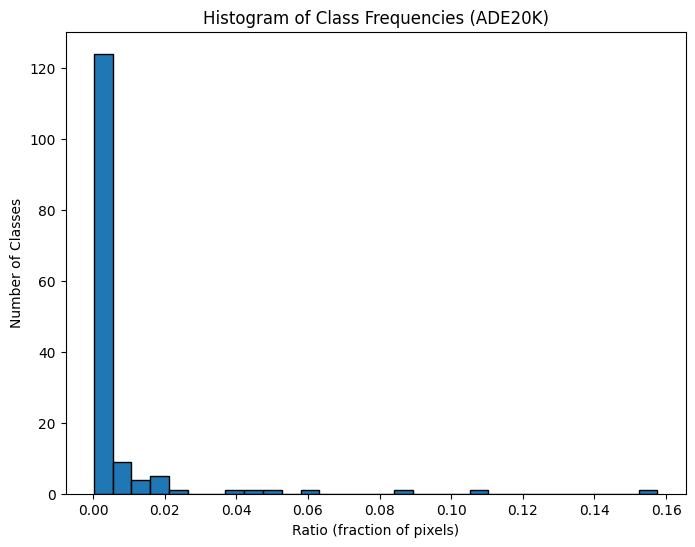

In [39]:
plt.figure(figsize=(8,6))
plt.hist(df["Ratio"], bins=30, edgecolor='black')
plt.xlabel("Ratio (fraction of pixels)")
plt.ylabel("Number of Classes")
plt.title("Histogram of Class Frequencies (ADE20K)")
plt.show()


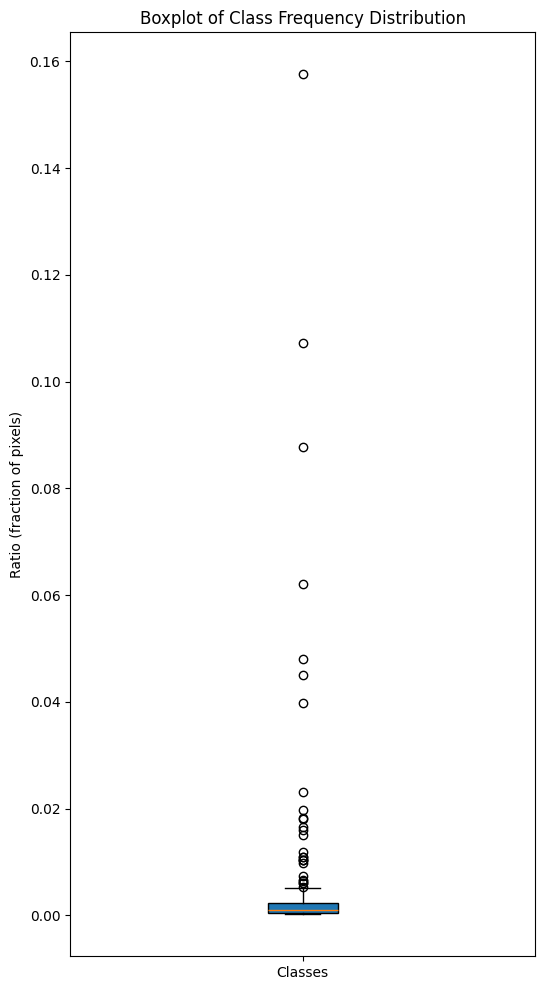

In [44]:
plt.figure(figsize=(6,12))
plt.boxplot(df["Ratio"], vert=True, patch_artist=True)
plt.ylabel("Ratio (fraction of pixels)")
plt.xticks([1], ["Classes"]) 
plt.title("Boxplot of Class Frequency Distribution")
plt.show()


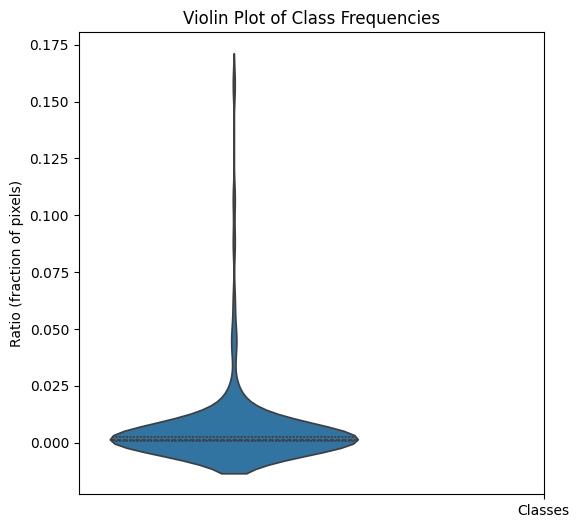

In [45]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.violinplot(y=df["Ratio"], inner="quartile")
plt.ylabel("Ratio (fraction of pixels)")
plt.xticks([1], ["Classes"]) 
plt.title("Violin Plot of Class Frequencies")
plt.show()


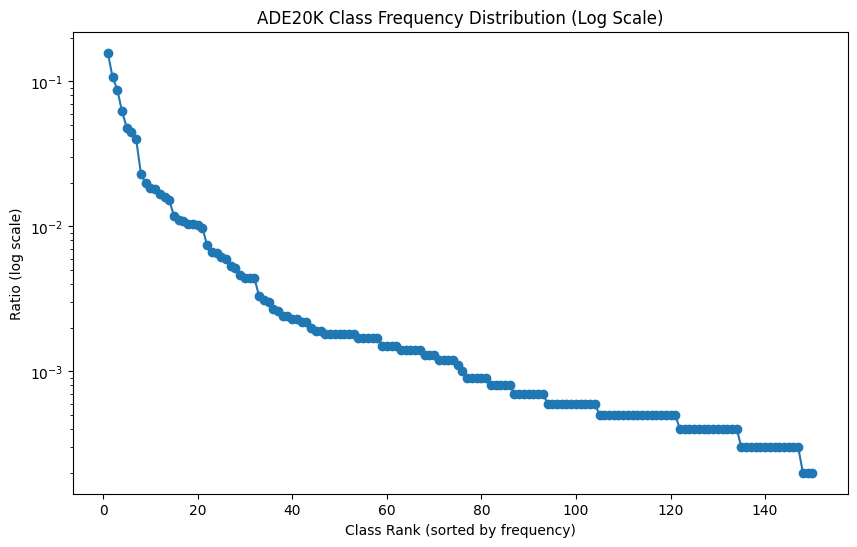

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(df)+1), df.sort_values("Ratio", ascending=False)["Ratio"].values, marker="o")
plt.yscale("log")
plt.xlabel("Class Rank (sorted by frequency)")
plt.ylabel("Ratio (log scale)")
plt.title("ADE20K Class Frequency Distribution (Log Scale)")
plt.show()


In [46]:
# Sort by ratio ascending (rarest first)
rare_classes = df.sort_values("Ratio", ascending=True)

# Show bottom 20 classes (rarest)
print(rare_classes.head(20)[["Idx", "Name", "Ratio"]])


     Idx                                               Name   Ratio
149  150                                               flag  0.0002
147  148                              glass, drinking glass  0.0002
148  149                                              clock  0.0002
136  137           traffic light, traffic signal, stoplight  0.0003
146  147                                           radiator  0.0003
137  138                                               tray  0.0003
138  139  ashcan, trash can, garbage can, wastebin, ash ...  0.0003
144  145                       bulletin board, notice board  0.0003
140  141                        pier, wharf, wharfage, dock  0.0003
141  142                                         crt screen  0.0003
135  136                                               vase  0.0003
139  140                                                fan  0.0003
134  135                                             sconce  0.0003
145  146                                        

In [48]:
# Sort by ratio ascending (rarest first)
rare_classes = df.sort_values("Ratio", ascending=False)

# Show bottom 20 classes (rarest)
print(rare_classes.head(20)[["Idx", "Name", "Ratio"]])


    Idx                                               Name   Ratio
0     1                                               wall  0.1576
1     2                                  building, edifice  0.1072
2     3                                                sky  0.0878
3     4                                    floor, flooring  0.0621
4     5                                               tree  0.0480
5     6                                            ceiling  0.0450
6     7                                        road, route  0.0398
7     8                                                bed  0.0231
8     9                                 windowpane, window  0.0198
9    10                                              grass  0.0183
10   11                                            cabinet  0.0181
11   12                                 sidewalk, pavement  0.0166
12   13  person, individual, someone, somebody, mortal,...  0.0160
13   14                                      earth, ground  0.